Copyright (c) 2017 Andrew Johnson, Dan Kotlyar, GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Results Reader

# #  Basic operations

In [1]:
%matplotlib notebook
import time
import numpy as np
import serpentTools
from serpentTools.settings import rc

In [2]:
start_time = time.time()
resFile = 'InnerAssembly_res.m'
res = serpentTools.read(resFile)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.7795577049255371 seconds ---


# Metadata

metadata is a collective data that describe the problem.
The following data is included:titles, data paths, etc are present inside the reader 

In [3]:
print(res.metadata['version'])  # Serpent version used for the execution
print(res.metadata['decayDataFilePath'])  # Directory path for data libraries
print(res.metadata['inputFileName'])  # Directory path for data libraries

Serpent 2.1.30
/nv/hp22/dkotlyar6/data/Codes/DATA/endfb7/sss_endfb7.dec
InnerAssembly


obtain all the variables in the metadata

In [4]:
res.metadata.keys()

dict_keys(['version', 'compileDate', 'debug', 'title', 'confidentialData', 'inputFileName', 'workingDirectory', 'hostname', 'cpuType', 'cpuMhz', 'startDate', 'completeDate', 'pop', 'cycles', 'skip', 'batchInterval', 'srcNormMode', 'seed', 'ufsMode', 'ufsOrder', 'neutronTransportMode', 'photonTransportMode', 'groupConstantGeneration', 'b1Calculation', 'b1BurnupCorrection', 'implicitReactionRates', 'optimizationMode', 'reconstructMicroxs', 'reconstructMacroxs', 'doubleIndexing', 'mgMajorantMode', 'spectrumCollapse', 'mpiTasks', 'ompThreads', 'mpiReproducibility', 'ompReproducibility', 'ompHistoryProfile', 'shareBufArray', 'shareRes2Array', 'xsDataFilePath', 'decayDataFilePath', 'sfyDataFilePath', 'nfyDataFilePath', 'braDataFilePath'])

In [5]:
# statistics used for the execution (histories, inactive and active cycles)
print(res.metadata['pop'], res.metadata['skip']  , res.metadata['cycles'])

[ 5000.] [ 10.] [ 50.]


Check if the used defined version and the utilized Serpent version match

In [6]:
print('User defined version: {}'.format(rc['serpentVersion']))
print('Used version: {}'.format(res.metadata['version']))
rc['serpentVersion'] in res.metadata['version']

User defined version: 2.1.29
Used version: Serpent 2.1.30


False

# Results Data (resdata)

These results are stored as a function of time/burnup/index and include integral parameters of the system.
Results, such as k-eff, total flux, execution times are included in .resdata. Some results include values and uncertainities (e.g. criticality) and some just the values (e.g. CPU resources). 

In [7]:
print(res.resdata['absKeff'])  # Values (1st col.) + std (2nd col.) 

[[  1.29160000e+00   9.00000000e-04]
 [  1.29500000e+00   9.30000000e-04]
 [  1.29172000e+00   9.10000000e-04]
 [  1.29172000e+00   7.80000000e-04]
 [  1.29312000e+00   6.80000000e-04]
 [  1.29140000e+00   7.80000000e-04]]


In [8]:
print(res.resdata['burnup']) # burnup intervals (MWd/kg) 
print(res.resdata['burnDays']) # time points (days)


[[ 0.        0.      ]
 [ 0.1       0.100001]
 [ 1.        1.00001 ]
 [ 2.        2.00001 ]
 [ 3.        3.00003 ]
 [ 4.        4.00004 ]]
[[  0.     ]
 [  1.20048]
 [ 12.0048 ]
 [ 24.0096 ]
 [ 36.0144 ]
 [ 48.0192 ]]


obtain all the variables in the resdata

In [9]:
res.resdata.keys()

dict_keys(['minMacroxs', 'dtThresh', 'stFrac', 'dtFrac', 'dtEff', 'reaSamplingEff', 'reaSamplingFail', 'totColEff', 'avgTrackingLoops', 'avgTracks', 'avgRealCol', 'avgVirtCol', 'avgSurfCross', 'lostParticles', 'cycleIdx', 'sourcePopulation', 'meanPopSize', 'meanPopWgt', 'simulationCompleted', 'totCpuTime', 'runningTime', 'initTime', 'processTime', 'transportCycleTime', 'burnupCycleTime', 'batemanSolutionTime', 'mpiOverheadTime', 'estimatedRunningTime', 'cpuUsage', 'transportCpuUsage', 'ompParallelFrac', 'availMem', 'allocMemsize', 'memsize', 'xsMemsize', 'matMemsize', 'resMemsize', 'miscMemsize', 'unknownMemsize', 'unusedMemsize', 'totCells', 'unionCells', 'neutronErgTol', 'neutronErgNe', 'neutronEmin', 'neutronEmax', 'uresDiluCut', 'uresEmin', 'uresEmax', 'uresAvail', 'uresUsed', 'totNuclides', 'totTransportNuclides', 'totDosimetryNuclides', 'totDecayNuclides', 'totPhotonNuclides', 'totReaChannels', 'totTransmuRea', 'useDelnu', 'useUres', 'useDbrc', 'implCapt', 'implNxn', 'implFiss', 

# # Plotting resdata

Basic 1-D plotting capabilities are not yet avaialble in the parser. Plotting capability is planned to be added in the near-term. 

<IPython.core.display.Javascript object>


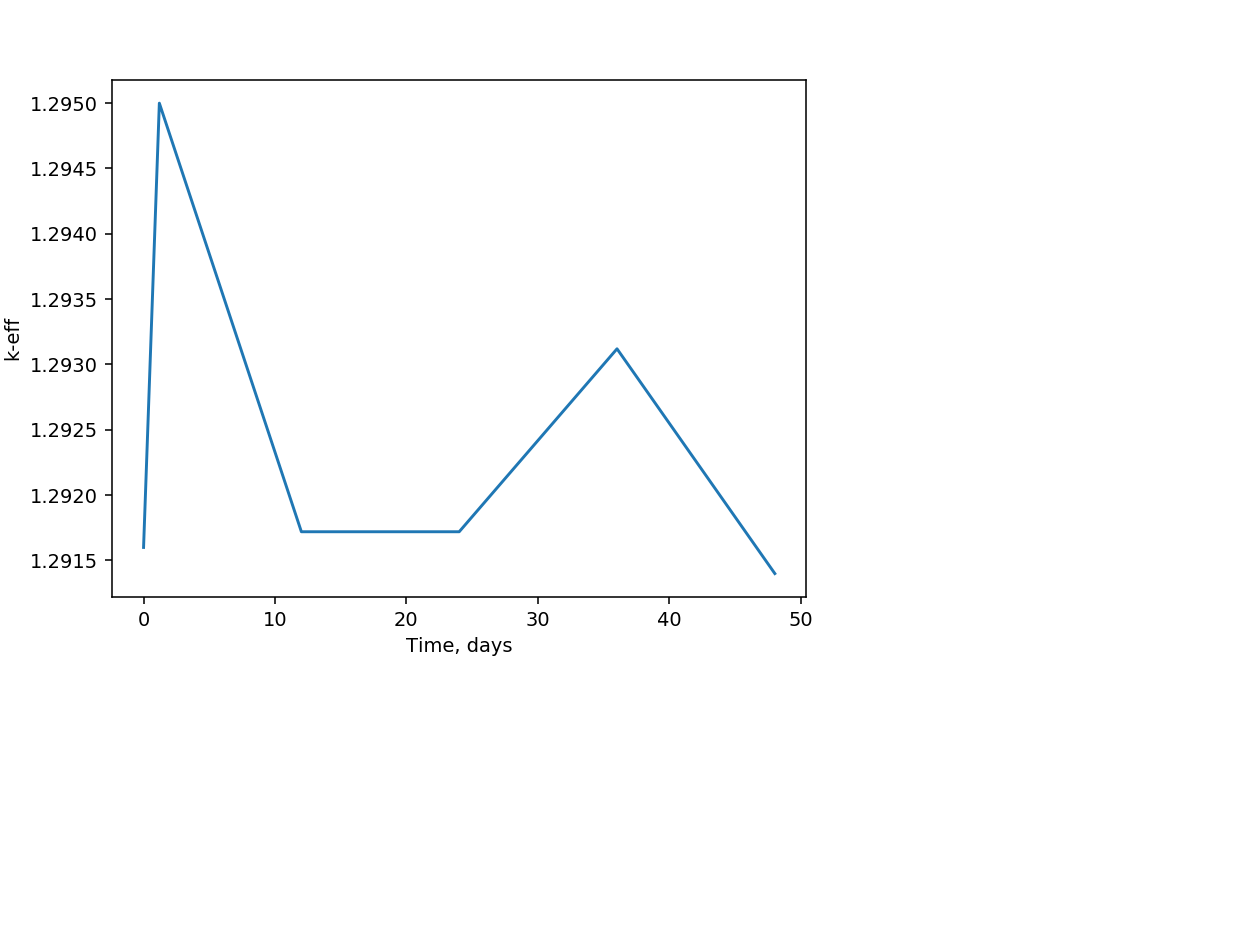

(<matplotlib.text.Text at 0x1e7f1a17630>,
 <matplotlib.text.Text at 0x1e7f1a27cc0>)

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
xdata = res.resdata['burnDays'][:]
ydata = res.resdata['absKeff'][:,0]
plt.plot(xdata, ydata)
plt.xlabel('Time, days'), plt.ylabel('k-eff')               

<IPython.core.display.Javascript object>


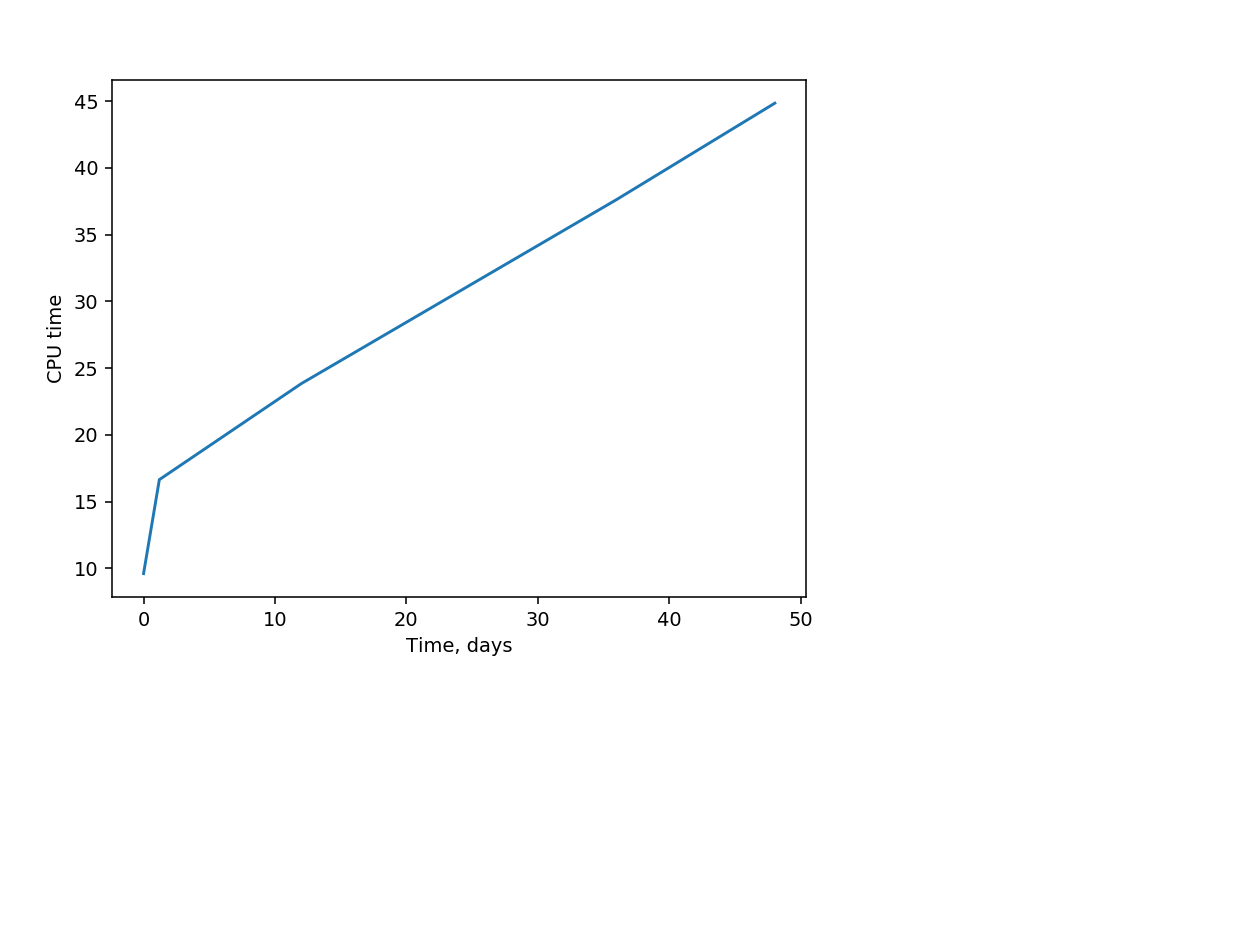

(<matplotlib.text.Text at 0x1e7f1d14e80>,
 <matplotlib.text.Text at 0x1e7f1a2e860>)

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
xdata = res.resdata['burnDays'][:]
ydata = res.resdata['runningTime'][:,0]
plt.plot(xdata, ydata)
plt.xlabel('Time, days'), plt.ylabel('CPU time')    

# Universe Data (univdata)

These results are stored in a container. The results include cross-sections, kinetic parameters, fluxes, etc. 
The results are stored for each universe (N) at unique burnup steps (M), resulting in N x M state points. In order to retrieve a specific result, the user needs to know these state points. 

The keys of .univdata correspond to a specific state ('universe', burnup, burnupIndex, days)

In [12]:
res.univdata.keys()  # obtain all the state-points

dict_keys([('3101', 0.0, 1, 0.0), ('3102', 0.0, 1, 0.0), ('0', 0.0, 1, 0.0), ('3101', 0.10000000000000001, 2, 1.20048), ('3102', 0.10000000000000001, 2, 1.20048), ('0', 0.10000000000000001, 2, 1.20048), ('3101', 1.0, 3, 12.004799999999999), ('3102', 1.0, 3, 12.004799999999999), ('0', 1.0, 3, 12.004799999999999), ('3101', 2.0, 4, 24.009599999999999), ('3102', 2.0, 4, 24.009599999999999), ('0', 2.0, 4, 24.009599999999999), ('3101', 3.0, 5, 36.014400000000002), ('3102', 3.0, 5, 36.014400000000002), ('0', 3.0, 5, 36.014400000000002), ('3101', 4.0, 6, 48.019199999999998), ('3102', 4.0, 6, 48.019199999999998), ('0', 4.0, 6, 48.019199999999998)])

Basic information on each state point, can be obtained as follows:

In [13]:
print(res.univdata[('3101', 3.0, 5, 36.014400000000002)].name)  # universe 
print(res.univdata[('0', 4.0, 6, 48.019199999999998)].day)   # days
print(res.univdata[('3102', 0.0, 1, 0.0)].bu)    # burnup
print(res.univdata[('3101', 2.0, 4, 24.009599999999999)].step)  # time-index 

3101
48.0192
0.0
4


In [14]:
len(res.univdata)  # number of state points

18

In [15]:
states = [st for st in res.univdata.keys()]  # obtain all the data points

In [16]:
st0 = res.univdata[states[0]]  # select the first state point

In [17]:
st0.infExp['infFlx']  # flux (value +- uncertainy) for each energy

array([  8.42797000e+14,   1.29777000e+16,   5.85772000e+16,
         1.27035000e+17,   2.13626000e+17,   3.46583000e+17,
         6.03098000e+17,   8.81659000e+17,   8.80992000e+17,
         9.48505000e+17,   7.75723000e+17,   5.69413000e+17,
         3.71471000e+17,   4.38192000e+17,   2.11030000e+17,
         8.73212000e+16,   6.05548000e+16,   1.70060000e+16,
         4.90273000e+16,   2.10107000e+16,   6.60065000e+15,
         1.27633000e+15,   6.55039000e+14,   5.45317000e+13])

Obtain just the values (without uncertainties)

In [18]:
st0.infExp['infFlx'][0::2]

array([  8.42797000e+14,   5.85772000e+16,   2.13626000e+17,
         6.03098000e+17,   8.80992000e+17,   7.75723000e+17,
         3.71471000e+17,   2.11030000e+17,   6.05548000e+16,
         4.90273000e+16,   6.60065000e+15,   6.55039000e+14])

Obtain the meta data stored in the universe data

In [19]:
st0.metadata.keys()

dict_keys(['microNg', 'microE', 'macroNg', 'macroE', 'cmmTranspxs', 'cmmTranspxsX', 'cmmTranspxsY', 'cmmTranspxsZ', 'cmmDiffcoef', 'cmmDiffcoefX', 'cmmDiffcoefY', 'cmmDiffcoefZ', 'betaEff', 'lambda'])

In [20]:
st0.metadata['macroE'][1:]

array([  1.00000000e+01,   6.06530000e+00,   3.67880000e+00,
         2.23130000e+00,   1.35340000e+00,   8.20850000e-01,
         4.97870000e-01,   3.01970000e-01,   1.83160000e-01,
         1.11090000e-01,   6.73800000e-02,   4.08680000e-02,
         2.47880000e-02,   1.50340000e-02,   9.11880000e-03,
         5.53090000e-03,   3.35460000e-03,   2.03470000e-03,
         1.23410000e-03,   7.48520000e-04,   4.54000000e-04,
         3.12030000e-04,   1.48940000e-04,   0.00000000e+00])

Plot flux as a function of energy

<IPython.core.display.Javascript object>


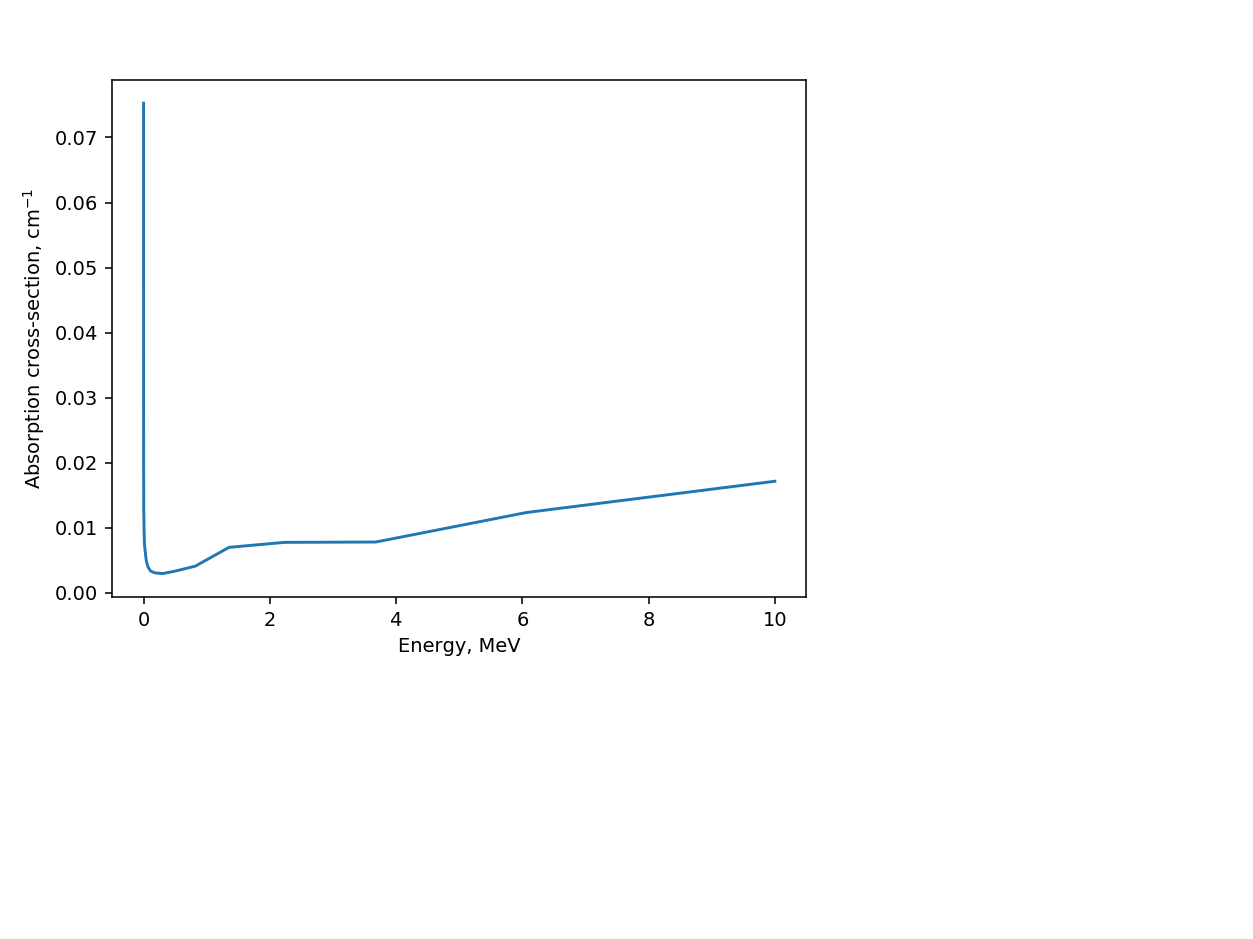

(<matplotlib.text.Text at 0x1e7f293ff28>,
 <matplotlib.text.Text at 0x1e7f241b780>)

In [21]:
%matplotlib notebook
xdata = st0.metadata['macroE'][1:]
ydata = st0.infExp['infAbs']
plt.plot(xdata, ydata)
plt.xlabel('Energy, MeV'), plt.ylabel('Absorption cross-section, cm$^{-1}$')  

Cross-section data is contained in two main dictionaries: 
'infExp' and 'b1Exp' (critical spectrum corrected)

In [22]:
st0.infExp

{'infAbs': array([ 0.0171589 ,  0.0123524 ,  0.00781827,  0.00776479,  0.00699868,
         0.00411079,  0.0033429 ,  0.00296985,  0.00307015,  0.00335173,
         0.00403141,  0.00506843,  0.0065172 ,  0.00737468,  0.00909636,
         0.0113676 ,  0.0125524 ,  0.0165316 ,  0.0181835 ,  0.0266955 ,
         0.0295919 ,  0.030432  ,  0.046651  ,  0.0752764 ]),
 'infCapt': array([ 0.00447076,  0.00191609,  0.00056309,  0.00042173,  0.00066631,
         0.00112337,  0.0012563 ,  0.0013117 ,  0.00151504,  0.0018232 ,
         0.00245305,  0.00345728,  0.00484914,  0.00561595,  0.00716529,
         0.00909841,  0.0099278 ,  0.01338   ,  0.0135129 ,  0.0208329 ,
         0.0218121 ,  0.0225649 ,  0.0325414 ,  0.0511715 ]),
 'infChid': array([ 0.        ,  0.        ,  0.        ,  0.0049994 ,  0.0280452 ,
         0.145301  ,  0.234781  ,  0.215004  ,  0.139593  ,  0.114364  ,
         0.0556479 ,  0.0295874 ,  0.0112208 ,  0.0131972 ,  0.00825865,
         0.        ,  0.        ,  0.    

<IPython.core.display.Javascript object>


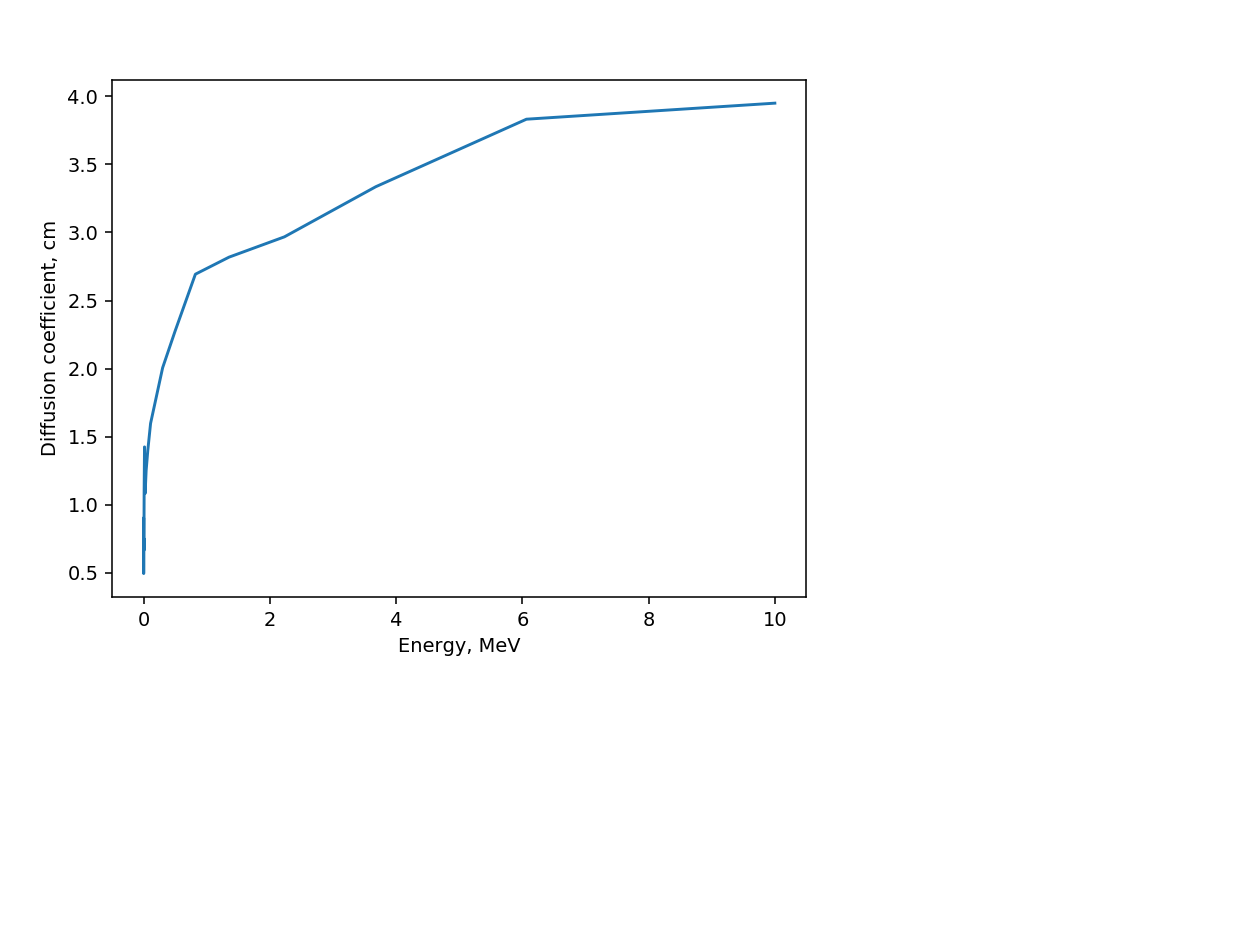

(<matplotlib.text.Text at 0x1e7f2f1c6d8>,
 <matplotlib.text.Text at 0x1e7f2f02a20>)

In [23]:
%matplotlib notebook
xdata = st0.metadata['macroE'][1:]
ydata = st0.infExp['infDiffcoef']
plt.plot(xdata, ydata)
plt.xlabel('Energy, MeV'), plt.ylabel('Diffusion coefficient, cm')  

Plot spectrum

<IPython.core.display.Javascript object>


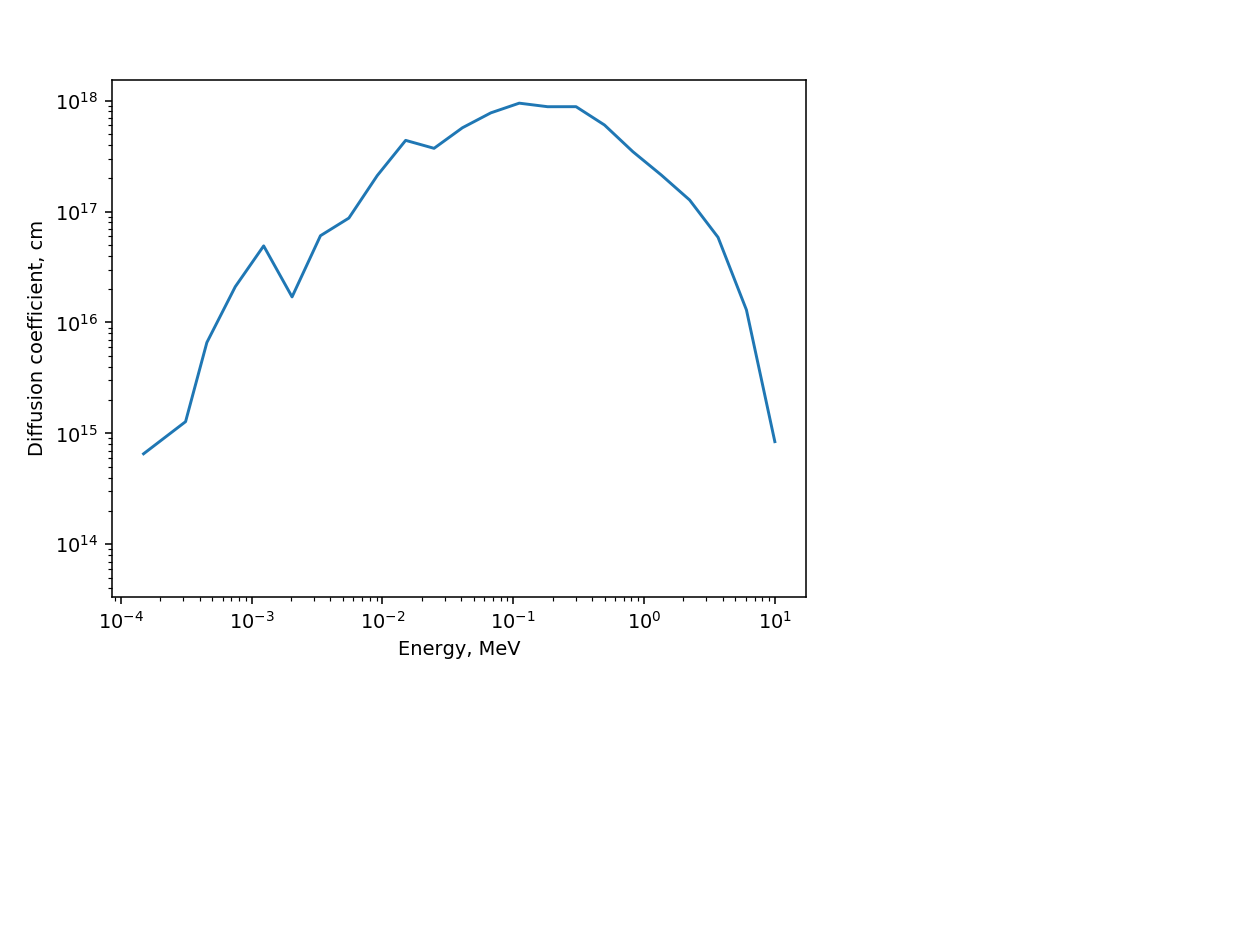

(<matplotlib.text.Text at 0x1e7f2efeda0>,
 <matplotlib.text.Text at 0x1e7f445b8d0>)

In [24]:
%matplotlib notebook
xdata = st0.metadata['macroE'][1:]
ydata = st0.infExp['infFlx']
plt.loglog(xdata, ydata)
plt.xlabel('Energy, MeV'), plt.ylabel('Diffusion coefficient, cm') 